In [ ]:
# DELANIE MONROE COURSE PROJECT

In [1]:
#PREPARE DATA

#import libraries
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
import statistics

#open file
file=open("Coral_Persistence_DM.txt") # Open the data file

#list of lists variables
first  = True
LoL = []
headers = ""
data = ""

#Create list of lists
for line in file:
    if first == True: #if we're at a header, exclude from list of values
        data = line.split("\t") #convert tab separated data into a list
        header = data 
        first = False #not in the first line after this loop, switch the value to proceed
    else: 
        #clean up values
        line = line.replace("\n", "")
        line = line.replace("NaN", "0")

        #split data
        data = line.split("\t")  
        
        #convert dates and measurements from string to int and float
        for row in data:
                b = data
                b[3] = int(b[3])
                b[4] = int(b[4])
                b[5] = int(b[5])
                b[6] = float(b[6])
                b[7] = float(b[7])
                b[8] = float(b[8])
                b[9] = float(b[9])
                b[10] = float(b[10])
        
        #add data to LoL
        LoL.append(data)

#array = np.array(LoL)

file.close

<function TextIOWrapper.close()>

In [2]:
# DATA DESCRIPTION 1
    #Characterize the mean, meadian and standard deviation of coral cover and grazer population

#Mean coral cover and grazer population
coral_sum = 0
grazer_sum = 0

for row in LoL:
    coral_sum+=row[9]
    grazer_sum+=row[10]

coral_mean = coral_sum/len(LoL)
grazer_mean = grazer_sum/len(LoL)        

print("Mean coral cover:",coral_mean)
print("Mean grazer population:",grazer_mean)


#Median coral cover and grazer population
list_coral = [] #coral cover values
list_grazer = [] #grazer population values
x = [] #x axis is years, use this for plots

for row in LoL:
    list_coral.append(row[9])
    list_grazer.append(row[10])
    x.append(row[5])
    

print("Median coral cover:",statistics.median(list_coral))
print("Median grazer population:",statistics.median(list_grazer))


#Standard Deviation of coral cover and grazer population
print("Standard deviation of coral cover:",statistics.stdev(list_coral))
print("Standard deviation of grazer population:",statistics.stdev(list_grazer))


Mean coral cover: 23.79185185185186
Mean grazer population: 15.72196611009877
Median coral cover: 20.770000000000003
Median grazer population: 12.0159313
Standard deviation of coral cover: 13.053420351951749
Standard deviation of grazer population: 12.593621561401054


Text(0.5, 1.0, 'Coral Cover Histogram')

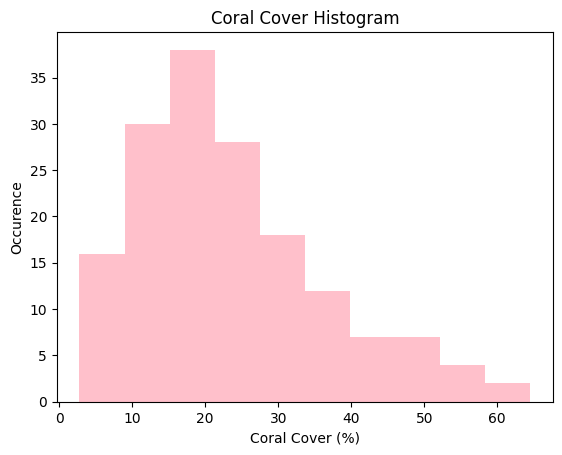

In [3]:
# DATA DESCRIPTION 2
    #Create Histograms of coral cover and grazer population

# Coral cover histogram
fig,ax = plt.subplots() 
ax.hist(list_coral, color = "pink")

#labels
ax.set_xlabel("Coral Cover (%)")
ax.set_ylabel("Occurence")
ax.set_title("Coral Cover Histogram")

Text(0.5, 1.0, 'Grazer Population Histogram')

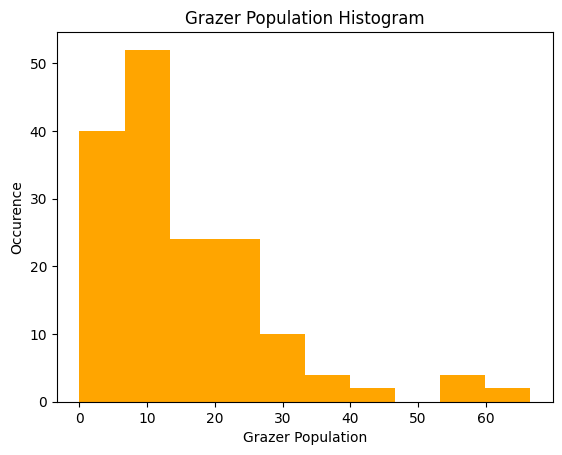

In [4]:
# Grazer population histogram
fig,ax = plt.subplots()
ax.hist(list_grazer, color = "orange")

#labels
ax.set_ylabel("Occurence")
ax.set_xlabel("Grazer Population")
ax.set_title("Grazer Population Histogram")

In [13]:
# CORRELATION

#Calculate Pearson and Spearman Correlation Coefficients between key variables relevant to your hypothesis.

#Pearson Coefficient between Coral Cover and Grazer Population
pearson_c = stats.pearsonr(list_coral, list_grazer)

#Spearman Coefficient between Coral Cover and Grazer Population
spearman_c = stats.spearmanr(list_coral, list_grazer)

print("Pearson Coefficient between Coral Cover and Grazer Population:",pearson_c[0])
print("Spearman Coefficient between Coral Cover and Grazer Population:",spearman_c[0])

Pearson Coefficient between Coral Cover and Grazer Population: -0.12717884355332912
Spearman Coefficient between Coral Cover and Grazer Population: -0.08552775981073721


In [6]:
#Conduct Linear regression on the above variable sets.
lin_result = stats.linregress(list_coral, list_grazer)
print(lin_result)


LinregressResult(slope=-0.12269904616132105, intercept=18.64120363873245, rvalue=-0.12717884355332904, pvalue=0.10680026358440388, stderr=0.07565286340344061, intercept_stderr=2.0515630988740514)


Text(0.5, 1.0, 'Coral Cover and Grazer Population')

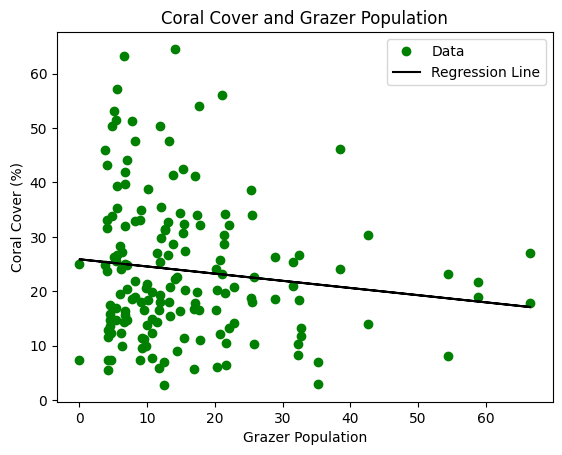

In [7]:
#Generate scatter plots of real data with linear regression lines overlaid
fig,ax = plt.subplots()


#convert to numpy array and plot data points
x = np.array(list_grazer)
y = np.array(list_coral)

plt.plot(x, y, 'o', color = "green", label = "Data")

#slope and y-intercept
m, b = np.polyfit(x, y, 1)

#add regression line to the plot
plt.plot(x, m*x+b, color = "black", label = "Regression Line")

#labels
plt.legend()
ax.set_xlabel("Grazer Population")
ax.set_ylabel("Coral Cover (%)")
ax.set_title("Coral Cover and Grazer Population")

In [8]:
import pandas as pd

#create table
df = pd.read_csv("Coral_Persistence_DM.txt", sep="\t")
df = df.replace(np.nan, value = 0) #clear out NaN
   

print(df)

          SurveyID    SiteID Name  Day  Month  Year  Depth_survey        Lat  \
0             21_A        21  DAR   17      1  2014          10.0  19.369160   
1             22_A        22  DAR   17      1  2014          14.0  19.297690   
2             96_A        96  DAR   17      1  2014           8.0  19.533500   
3             13_A        13  DAR   21      2  2014          11.0  19.647250   
4             14_A        14  DAR   21      2  2014          11.0  19.631530   
..             ...       ...  ...  ...    ...   ...           ...        ...   
157  Fixed_2016_15  Fixed_15  NPS   31     10  2016          10.0  19.665338   
158   Fixed_2016_9   Fixed_9  NPS    1     11  2016          16.0  19.675626   
159   Fixed_2016_2   Fixed_2  NPS    2     11  2016          19.0  19.690525   
160  Fixed_2016_12  Fixed_12  NPS    4     11  2016          12.0  19.668224   
161   Fixed_2016_3   Fixed_3  NPS    7     11  2016          11.0  19.688679   

           Long  Coral  grazers_2015  


In [9]:
# DIMENSIONALITY REDUCTION
#Conduct Principle Components Analysis using all quantitative variables in your data set for across all samples.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA #actual PCA script

#Preprocess to only numerical values
    #index location function- give it values we want in form [rows, cols]
data = df.iloc[:, 6:11] #all rows, columns 6 through 10
    
#Rescaling
sc = StandardScaler() #rename to a vriable sc

data_Scaled = sc.fit_transform(data) #StandardScaler is instructions, fit.transform executes instructions

pca = PCA(n_components = 4) 
    #tell how many PC we want (# features - 1)

principalComponents = pca.fit_transform(data_Scaled) #run pca

principalDf = pd.DataFrame(data = principalComponents) #convert back to data frame

print(principalDf)

            0         1         2         3
0   -1.228583 -0.482372  1.440034  1.045439
1   -1.566252  0.235249 -0.033490  1.899433
2   -0.514965 -0.605123  0.649855 -0.684628
3   -1.591179 -0.080380  1.391393  0.153348
4   -1.413923 -0.800275  1.385985  0.107284
..        ...       ...       ...       ...
157 -0.489998  0.033420 -0.901528 -1.402019
158 -1.003969  1.285258 -2.498249  0.113641
159 -1.702052 -1.225174 -2.440704 -0.262693
160 -0.913561 -0.402701 -0.791834 -0.935638
161 -0.858178 -0.395049 -0.444303 -1.132741

[162 rows x 4 columns]


[0.35558869 0.22138092 0.20594105 0.1103963 ]


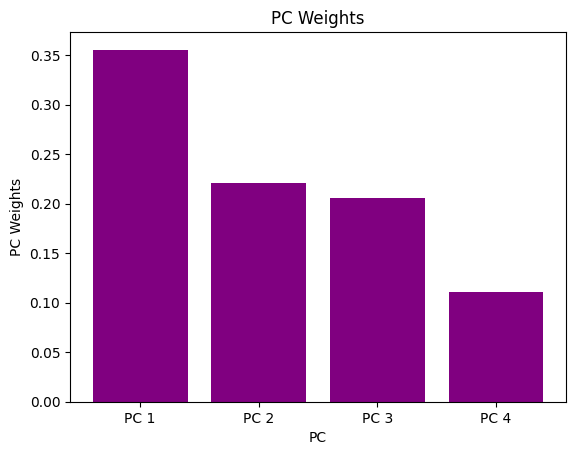

In [12]:
#PC Weights and Plot
a = pca.explained_variance_ratio_
W_PC1 = a[0]
W_PC2 = a[1]
W_PC3 = a[2]
W_PC4 = a[3]

#bar plot
fig,ax = plt.subplots()
x = ["PC 1", "PC 2", "PC 3", "PC 4"]
y = a
ax.bar(x,a, color = "purple")

ax.set_xlabel("PC")
ax.set_ylabel("PC Weights")
ax.set_title("PC Weights")
print(a)

Text(0.5, 1.0, 'PCA')

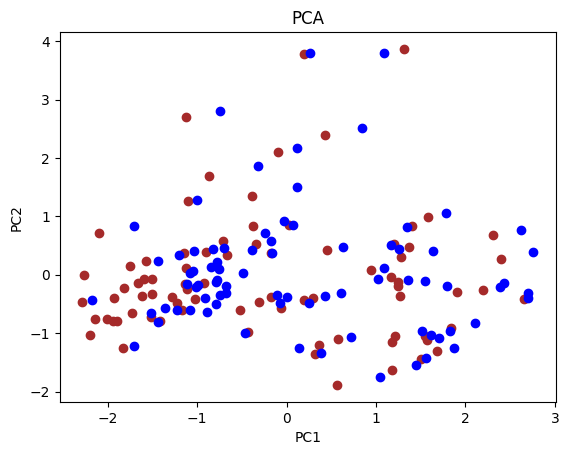

In [17]:
#plot PCs

fig,ax = plt.subplots()

#compare PC1 (columns 0:1) to PC2 (columns 1:2)
ax.scatter(principalDf.iloc[0:80, 0:1], principalDf.iloc[0:80, 1:2], color = "brown")
ax.scatter(principalDf.iloc[81:161, 0:1], principalDf.iloc[81:161, 1:2], color = "blue")

#labels and title
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA")